In [1]:
import pandas as pd
import seaborn as sns 

loans_df = pd.read_csv ('prosperLoanData.csv')
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# Exploratory Data Analysis 

## We're exploring data set contains 113,937 loans with 81 variables or features on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### Some of the questions we want to find out their answers 

### What factors affect a loan’s outcome status?
### What affects the borrower’s APR or interest rate?
### What's the relation relation between Credit Lines, Income Range and Employment Status?
### What's the most probable city of borrowers ?
### What's IncomeRange Percantage between variety of loaners?
### relation bbetween loan status and original amount of loan

### Multivariant relation between Credit Lines, Income Range and Employment Status
#### There is a dense amount of people of employed and fulltime categories in 5 variable income ranges
#### its obvious that most of self employed are in 0 income category and the limit of no. of credit lines of self employed is 30 

[Text(0.5, 1.0, 'Relation between Income Range, Credit Lines and Employment Status')]

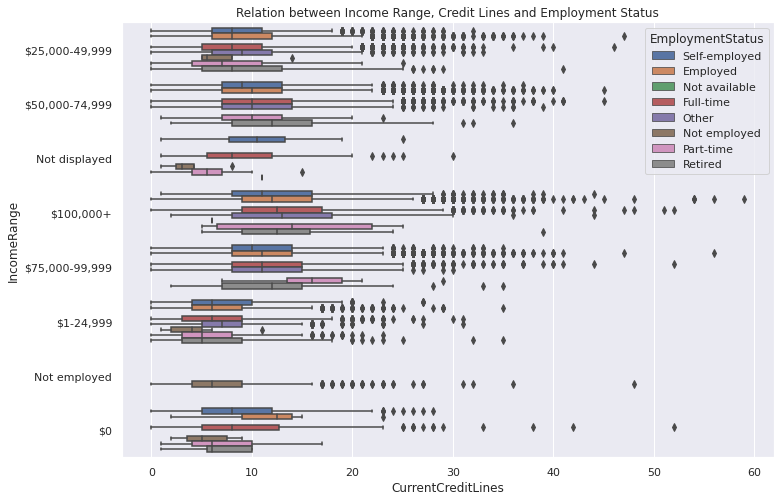

In [2]:
sns.set(rc={'figure.figsize':( 11.69, 8)})
# Multivariant relation by plotting 2 features on x, y axes and mark through 3rd variable and set the title 
sns.boxplot(x="CurrentCreditLines", y="IncomeRange", hue="EmploymentStatus",data=loans_df).set(title='Relation between Income Range, Credit Lines and Employment Status')

## Univariate Plot 
## The most probable city of borrowers is in CA city
### Finding: That might be give indications of costy life in the city or high life of investment in the city population

[Text(0.5, 1.0, 'Detecting most city of borrowers')]

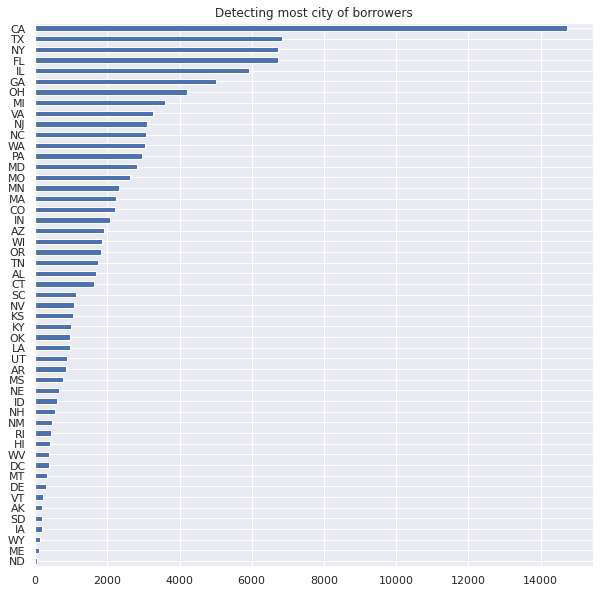

In [3]:
# Change plot size to 10*10
# plot the highest borrowers in cities by kind bar chart 
sns.set(rc={'figure.figsize':(10,10)})
loans_df['BorrowerState'].value_counts().sort_values().plot(kind = 'barh').set(title='Detecting most city of borrowers')

## Univariate Chart
## IncomeRange Percantage between variety of loaners 
### Finding: 25K - 50K is the most income appeared

[Text(0.5, 1.0, 'Income Range Percantage between variety of loaners')]

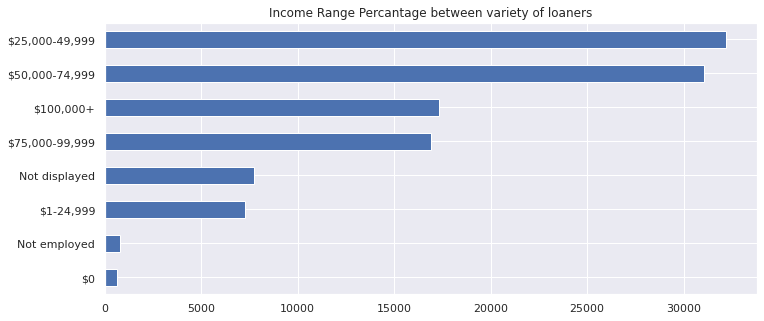

In [4]:
# Income Range counts between variety of loaners by kind bar chart
sns.set(rc={'figure.figsize':( 11.69, 5)})
loans_df['IncomeRange'].value_counts().sort_values().plot(kind = 'barh').set(title='Income Range Percantage between variety of loaners')

## Bivariate Chart
## Trying to find a relation between income range and original amount of loan
### Finding: There's an increment betweeen the amount of loaners who have 100K income 

[Text(0.5, 1.0, 'relation between income range and original amount of loan')]

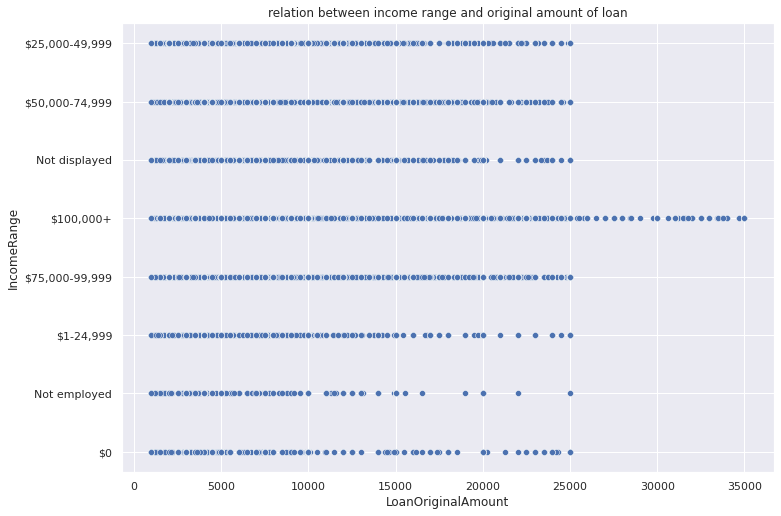

In [5]:
# Change plot size to 11.69*8.27
# Bivariate relation by plotting 2 features of loans_df dataset on x and y axes and set the title 
sns.set(rc={'figure.figsize':( 11.69, 8.27)})
sns.scatterplot(data=loans_df, x="LoanOriginalAmount", y="IncomeRange").set(title='relation between income range and original amount of loan')

## Bivariate Chart
## Finding:As seen that very little amount of people cancelled and most of them in current state and have high loan originals amount 

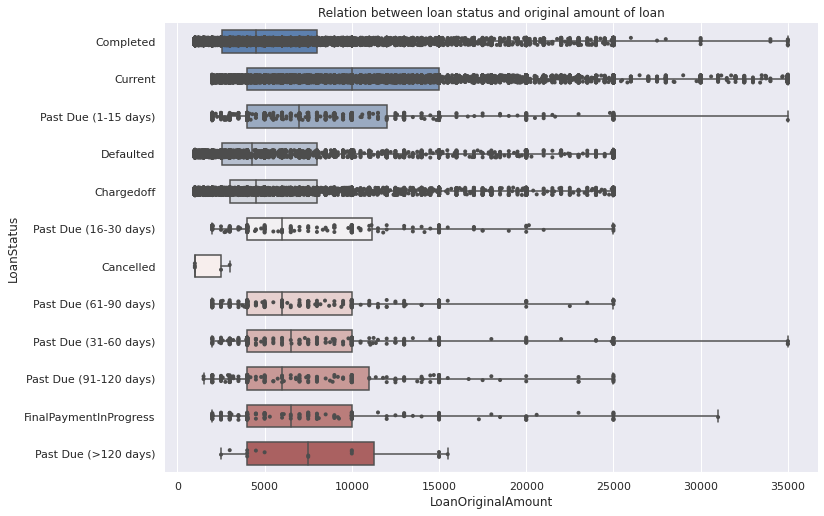

In [6]:
# Bivariate relation by plotting 2 features of loans_df dataset on x and y axes and set the title 
sns.boxplot(x="LoanOriginalAmount", y="LoanStatus", data=loans_df,
            whis=[0, 100], width=.6, palette="vlag").set(title='Relation between loan status and original amount of loan')

sns.stripplot(x="LoanOriginalAmount", y="LoanStatus", data=loans_df,
              size=4, color=".3", linewidth=0)
sns.despine(trim=True, left=True)

## Univariate Chart
### Finding: As seen that highest percentage in current and completed states and how are about to finish in rest of categories are very low

[Text(0.5, 1.0, 'categories of loan status percentage')]

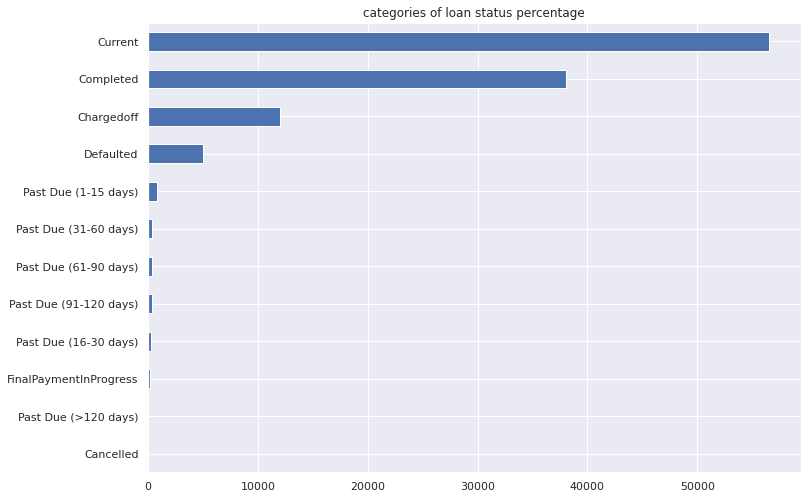

In [7]:
# Change plot size to 11.69* 8.27
# plot the types of Loan Status by kind bar chart 
sns.set(rc={'figure.figsize':( 11.69, 8.27)})
loans_df['LoanStatus'].value_counts().sort_values().plot(kind = 'barh').set(title='categories of loan status percentage')

## Bivariate Chart
### Finding: It's found that most of loaners have 100% funding and most of them have investors more than 400 investors

[Text(0.5, 1.0, 'Relation between percent funded and investors')]

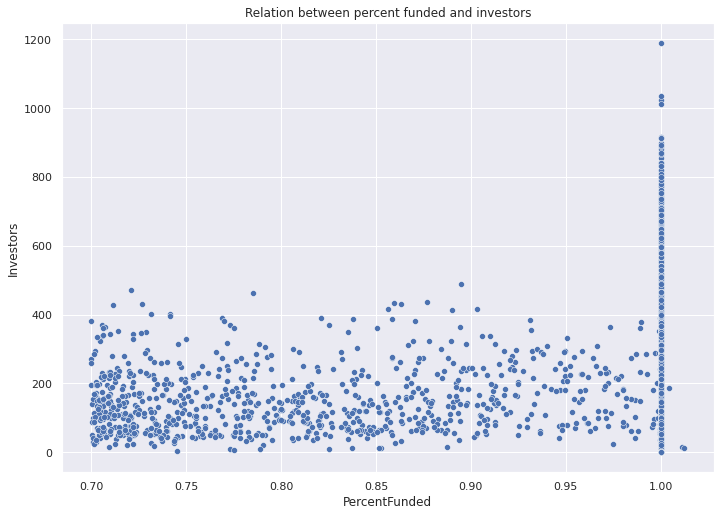

In [8]:
# Bivariate relation by plotting 2 features of loans_df dataset on x and y axes and set the title 
sns.scatterplot(data=loans_df, x="PercentFunded", y="Investors").set(title='Relation between percent funded and investors')

# Findings

#### 1- There's no relationship between home ownership and the loaning
#### 2- At the low and high CurrentCreditLines there're people with low and high EstimatedLoss value so, also there's no relationship
#### 3- There's a clear direct propotion between Borrower Rate and annual percentage rate
#### 4- There is a dense amount of people of employed and fulltime categories in 5 variable income ranges
#### 5- Its obvious that most of self employed are in 0 income category and the limit of no. of credit lines of self employed is 30 
#### 6- The most probable city of borrowers is in CA city, That might be give indications of costy life in the city or high life of investment in the city population
#### 7- 25K - 50K is the most income appeared between loaners 
#### 8- There's an increment betweeen the amount of loaners who have 100K income
#### 9- There's an increment in credit with loaners who have 100K income and also this category from the least people who have no. of loaners
#### 10- It's found that most of 100K income category own home and in 2 catgories( not employed and 0 to 25K) most of them don't own home
#### 11- There is very little amount of people cancelled and most of them in current state and have high loan originals amount
#### 12- The highest percentage in current and completed states and how are about to finish in rest of categories are very low
#### 13- It's found that most of loaners have 100% funding and most of them have investors more than 400 investors
#### 14- It's found that most of loaners don't have recommendations to investors

In [9]:
!jupyter nbconvert prosperLoanData_Analysis_forslides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook prosperLoanData_Analysis_forslides.ipynb to slides
[NbConvertApp] Writing 1014881 bytes to prosperLoanData_Analysis_forslides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/prosperLoanData_Analysis_forslides.slides.html
Use Control-C to stop this server
^C

Interrupted
